### 파이썬으로 데이터 과학 실습

- 목표 : 타이타닉 데이터를 이용하여 데이터 전처리 및 데이터 분석을 파이썬으로 수행할 수 있다.

- 사용 도구
  - 개발환경 : Google Colaboratory ( Python3 )
  - 데이터 : 타이타닉 생존 데이터 [csv]( https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv )

- 학습방법
  1. 아래 데이터를 실행해 보면서 전반적인 실습 과정을 살펴보기
  2. 새로운 코랩 파일을 열고, 셀 단위로 코드를 따라서 입력해본 뒤 실행하기
  3. 에러가 발생한 경우, 에러 메시지를 보고 에러가 발생한 줄의 코드를 샘플 코드와 비교하기
  4. 다른 데이터를 가져와서 비슷한 과정으로 실습하기
    - [seaborn data](https://github.com/mwaskom/seaborn-data)

- 실습 과정
  1. 데이터 수집
  2. 데이터 전처리
  3. 데이터 분석 (그래프로 표현)

- 참고자료
  - 이지영(2020). 데이터 과학 기반의 파이썬 빅데이터 분석. 서울: 한빛아카데미.
p218. 상관분석 + 히트맵 타이타닉호 생존율 분석하기 [yes24](http://www.yes24.com/Product/Goods/96652194)

### 1.데이터 수집하기
- seaborn 라이브러리에서 제공하는 타이타닉 데이터 가져오기

In [194]:
import seaborn as sns
import pandas as pd

# 데이터 불러오기
titanic = sns.load_dataset('titanic') # seaborn에서 제공하는 titanic 데이터
# https://www.kaggle.com/c/titanic/data?select=test.csv 에서 원 데이터의 자세한 의미를 확인할 수 있다

# 데이터 출력하기
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [195]:
# 데이터 기본 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [196]:
# 생존여부 데이터의 빈도수 확인
titanic['survived'].value_counts() # survived와 alive는 같은 의미지만 Dtype이 다르다
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

### 2.데이터 전처리하기
- 데이터 결측값을 확인한 뒤, 비어있는 값을 적절한 값으로 채워넣기

In [197]:
# 데이터 결측값 확인하기
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [198]:
# age 열의 결측값을 중앙값(median())으로 치환하기
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
# age 열의 비어있는 값의 합계 출력하기
titanic['age'].isnull().sum()

0

In [199]:
# embarked 열의 빈도수 확인하기
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [200]:
# embarked 열의 결측값을 최빈값으로 치환하기
titanic['embarked'] = titanic['embarked'].fillna('S')
# embarked 열의 비어있는 값의 합계 출력하기
titanic['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [201]:
# embark_town 열의 빈도수 확인하기
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [202]:
# embark_town 열의 결측값을 최빈값으로 치환하기
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
# embark_town 열의 비어있는 값의 합계 출력하기
titanic['embark_town'].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [203]:
# deck 열의 빈도수 확인하기
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [204]:
# deck 열의 결측값을 최빈값으로 치환하기
titanic['deck'] = titanic['deck'].fillna('C')
titanic['deck'].isnull().sum()

0

In [205]:
# 전체 결측값 확인
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### 3.탐색적 데이터 분석하기
- 승객 성별 분석 : 남성보다 여성의 생존율이 높다
- 객실 클래스 분석 : 클래스가 높을수록 생존율이 높다.
- 승객 나이 분석 : 5-10살 생존율이 높고, 15-35살 성인들이 많이 사망했다.


In [206]:
# 그래프를 그리기 위한 라이브러리 불러오기
import matplotlib.pyplot as plt

3.1 승객 성별 분석

In [207]:
# 성별과 생존유무에 따라 그룹화 한 뒤, 생존자 및 사망자 수를 세기
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

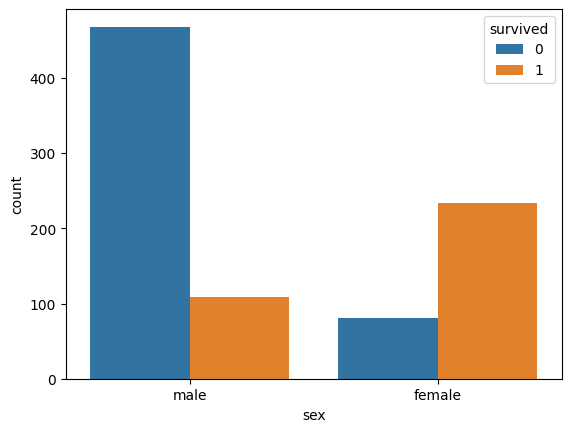

In [208]:
# 성별에 따른 생존자 및 사망자 수를 막대 그래프로 그리기
import seaborn as sns

sns.countplot(x='sex', hue='survived', data=titanic) # hue는 구분하는 것

plt.show()

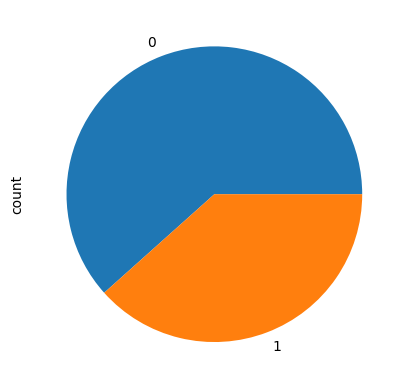

In [209]:
# 전체 인원에 대한 생존 비율을 파이 차트로 그리기
# survived 값에 따른 파이 차트 생성하기
titanic['survived'].value_counts().plot.pie()

# 생성한 차트를 보여주기
plt.show()

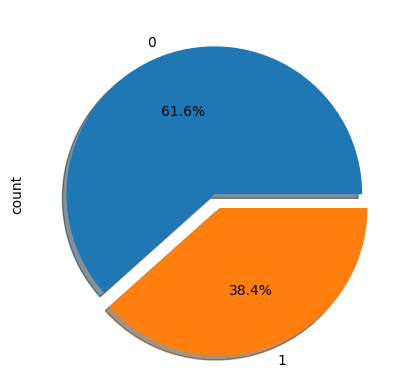

In [210]:
# 파이 차트 꾸미기
# explode : 파이 조각이 돌출되는 크기(0 이면 돌출되지 않음)
# autopct : 파이 조각의 전체 대비 백분율 - 소수점 1자리까지 %로 표기
# shadow : 그림자 표시(true)
titanic['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                            autopct='%1.1f%%', # %와% 사이에 원하는 값 지정
                                            shadow=True)


plt.show()

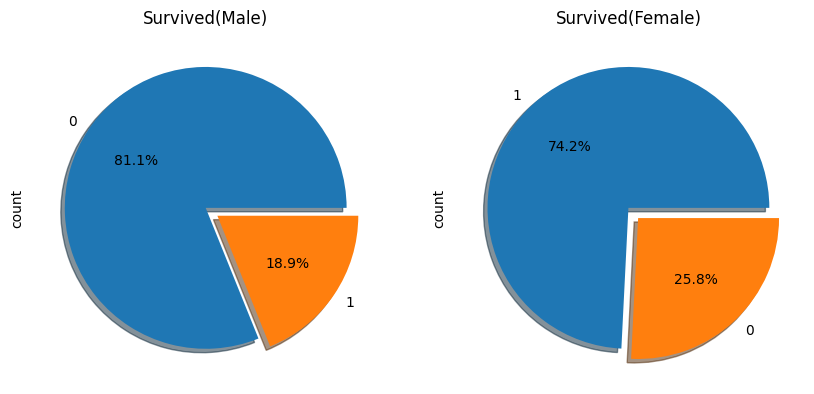

In [211]:
# 성별에 따른 생존 비율을 파이 차트로 그리기
# 한 줄에 두 개의 차트를 그리기
f, ax = plt.subplots(1, 2, figsize=(10,5))

# 첫 번째 파이 차트는 남자 승객의 생존 비율 그리기
titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(explode=[0, 0.1],
                                                                    autopct='%1.1f%%',
                                                                    ax=ax[0],
                                                                    shadow=True)

# 첫 번째 파이 차트 제목 설정하기
ax[0].set_title('Survived(Male)')

# 두 번째 파이 차트는 여자 승객의 생존 비율 그리기
titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(explode=[0, 0.1],
                                                                      autopct='%1.1f%%',
                                                                      ax=ax[1],
                                                                      shadow=True)

# 두 번째 파이 차트 제목 설정하기
ax[1].set_title('Survived(Female)')

plt.show()

3.2 객실 클래스 분석

In [212]:
# 클래스 별 사람수
titanic.groupby(['pclass'])['pclass'].count()

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

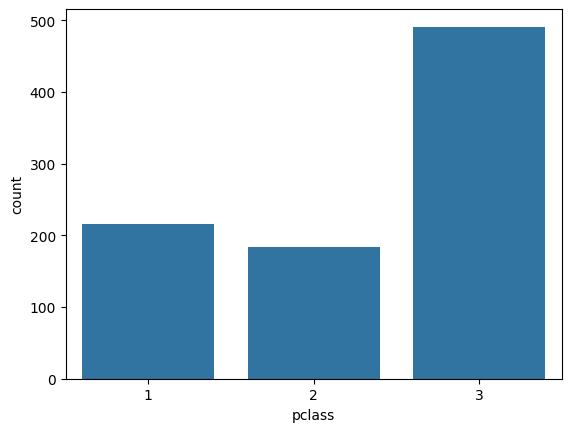

In [213]:
# 클래스 별 사람수에 대한 막대 그래프 그리기
sns.countplot(x='pclass', data=titanic)
plt.show()

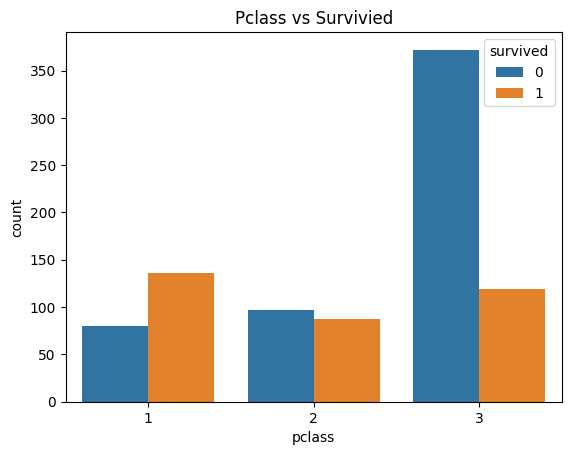

In [214]:
# 클래스 별로 생존자 및 사망자 수에 대한 막대 그래프 그리기
# hue 인자에 카테고리 변수를 지정하면, 카테고리 별로 구분하여 그래프를 그림
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survivied')

plt.show()

In [215]:
# 클래스별 생존율
titanic[['pclass', 'survived']].groupby('pclass').mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


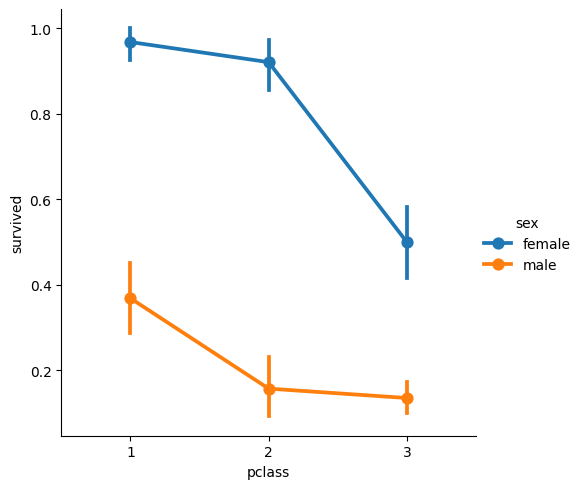

In [216]:
# 성별에 따른 pclass 와 survived 변수의 관계를 차트로 그리기
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')
plt.show()

3.3 승객 나이 분석

In [217]:
print(titanic['age'].max())
print(titanic['age'].min())
print(titanic['age'].mean())

80.0
0.42
29.36158249158249


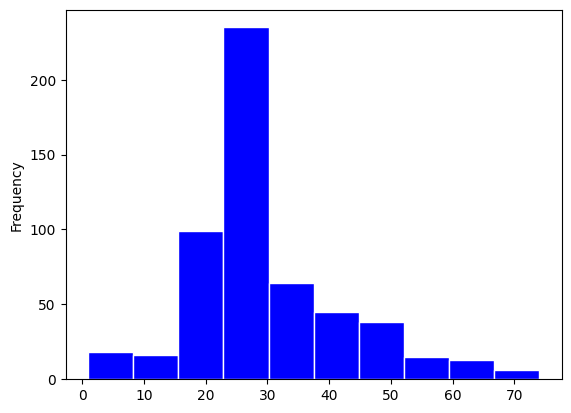

In [218]:
# 연령별로 사망자에 대한 히스토그램 그리기
titanic[titanic.survived==0].age.plot.hist(edgecolor='white', # edgecolor는 막대와 막대 사이 구분
                                           bins=10,
                                           color='blue')
plt.show()

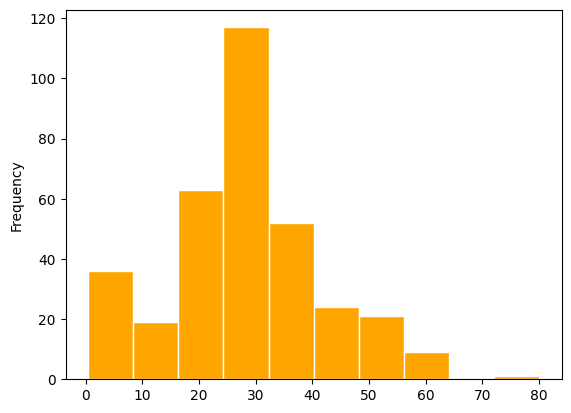

In [219]:
# 연령별로 생존자에 대한 히스토그램 그리기
titanic[titanic.survived==1].age.plot.hist(edgecolor='white',
                                           bins=10,
                                           color='orange')
plt.show()

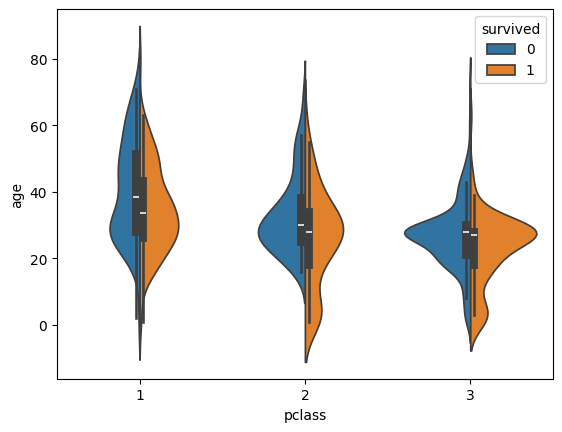

In [220]:
# 클래스별 나이의 분포도 그리기
# violinplot ( https://seaborn.pydata.org/generated/seaborn.violinplot.html )
sns.violinplot(x='pclass', y='age', hue='survived', data=titanic, split=True)
plt.show()

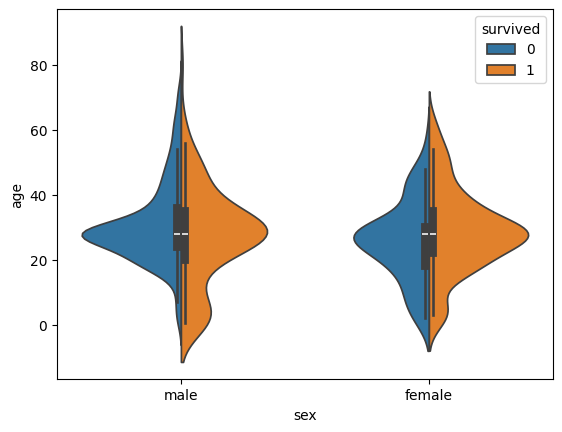

In [221]:
# 성별에 따른 나이의 분포도 그리기
sns.violinplot(x='sex', y='age', hue='survived', data=titanic, split=True)
plt.show()

### 4.데이터 분석하기
- 생존여부와 연관된 변수 -> 상관계수

In [222]:
titanic.corr(method='pearson', numeric_only=True)
# 절댓값으로 생각해야 한다
# 0~1사이에서
# 0.7~이면 상관관계가 높다
# 0.3~0.7 어느 정도 상관관계가 있다
# ~0.3 상관관계 없다

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [223]:
# 특정 변수 사이의 상관 계수 구하기
# 생존 여부와 성인 남성간의 상관 계수 구하기
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

<Axes: >

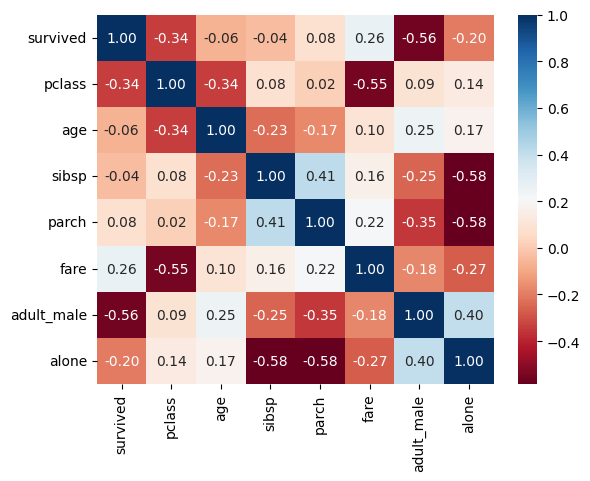

In [224]:
# seaborn 으로 히트맵 그리기
sns.heatmap(data=titanic.corr(numeric_only=True),
            annot=True, # True이면 숫자값 보인다
            fmt='.2f',
            cmap='RdBu')
# 진할수록 상관관계가 높다

In [225]:
# 상관계수는 연속형(숫자로 표현 가능한) 데이터에 대해서만 분석 가능
# 상관계수는 증가 또는 감소하는 방향성에 대한 것이지, 인과관계를 나타내는 것이 아님

# 성별을 1/0 으로 치환하여 추가하기
titanic['sex_c'] = titanic['sex'].map({'male':1, 'female':0})
titanic['sex_c']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex_c, Length: 891, dtype: int64

In [226]:
# 가족의 수를 구하여 추가하기
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['family']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: family, Length: 891, dtype: int64

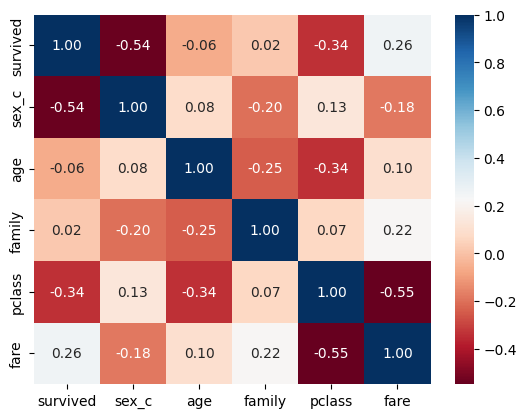

In [227]:
heatmap_data = titanic[['survived', 'sex_c', 'age', 'family', 'pclass', 'fare']]
sns.heatmap(data=heatmap_data.astype(float).corr(),
            annot=True,
            fmt='.2f',
            cmap='RdBu')
plt.show()